In [1]:

import pandas as pd
import numpy as np
import sklearn.cluster
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re
import glob
from matplotlib import cm

In [2]:

def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename
 
    dataframe = pd.read_csv( filename )
    dataframe['Date'] = pd.to_datetime(dataframe.Date)
    return dataframe

def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)

def getCap( filename ):
    return re.sub(r'^.*/(\w+_Cap)/.*$', '\\1', filename)

In [3]:
filenames = glob.glob(r'E:/Internship/Stocks/**/*.csv')

portfolio_caps_seen = { getCap(filename): 0 for filename in filenames }
portfolio = DataFrame()
for filename in filenames:
    if  portfolio_caps_seen[ getCap(filename) ] < 10:
        portfolio_caps_seen[ getCap(filename) ] += 1
        portfolio[ getName(filename) ] = read_csv(filename)['Close Price']

print('portfolio.shape:          ', portfolio.shape)
print('portfolio.shape.dropna(): ', portfolio.dropna().shape)
portfolio.head()


portfolio.shape:           (495, 76)
portfolio.shape.dropna():  (151, 76)


,Stocks\Large_Cap\ADANIPORTS,Stocks\Large_Cap\ASIANPAINT,Stocks\Large_Cap\AXISBANK,Stocks\Large_Cap\BAJFINANCE,Stocks\Large_Cap\BPCL,Stocks\Large_Cap\CIPLA,Stocks\Large_Cap\DRREDDY,Stocks\Large_Cap\EICHERMOT,Stocks\Large_Cap\GAIL,Stocks\Large_Cap\HDFC,...,Stocks\Small_Cap\MINDAIND,Stocks\Small_Cap\NCC,Stocks\Small_Cap\PVR,Stocks\Small_Cap\RAYMOND,Stocks\Small_Cap\RCOM,Stocks\Small_Cap\SONATSOFTW,Stocks\Small_Cap\SUZLON,Stocks\Small_Cap\VENKEYS,Stocks\Small_Cap\VIPIND,Stocks\Small_Cap\WELSPUNIND
0,356.20,1148.05,500.1,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,...,517.90,97.35,1524.95,772.80,32.00,162.65,19.6,1169.70,199.20,90.25
1,354.50,1142.85,501.5,1347.75,733.30,565.60,2724.10,29362.50,411.40,205.00,...,545.60,100.40,1539.00,785.00,32.10,158.60,19.7,1177.00,200.90,90.65
2,348.55,1154.95,502.8,1324.80,727.45,562.35,2736.90,29093.55,408.30,1566.55,...,560.10,101.45,1530.30,783.65,31.95,158.25,19.9,1188.00,199.65,88.85
3,347.90,1151.35,492.0,1314.55,714.90,560.10,2678.95,28357.30,404.75,1552.50,...,545.25,97.00,1515.05,746.95,31.05,157.40,20.0,1156.90,193.30,86.90
4,349.45,1123.15,501.7,1289.15,702.45,564.95,2656.45,27936.05,401.05,207.00,...,560.80,95.45,1513.55,723.10,30.55,151.90,20.6,1161.65,195.95,85.05


In [4]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([0.02197802, 0.00999001, 0.004995  , 0.01698302, 0.000999  ,
       0.01598402, 0.02397602, 0.00899101, 0.02097902, 0.00799201,
       0.        , 0.004995  , 0.01398601, 0.01398601, 0.02097902,
       0.004995  , 0.01698302, 0.003996  , 0.00899101, 0.01598402,
       0.01498501, 0.01098901, 0.02197802, 0.00799201, 0.00899101,
       0.01898102, 0.002997  , 0.        , 0.001998  , 0.01798202,
       0.02497502, 0.001998  , 0.01698302, 0.02097902, 0.01698302,
       0.02497502, 0.01098901, 0.01498501, 0.00899101, 0.00899101,
       0.01598402, 0.003996  , 0.02297702, 0.000999  , 0.01598402,
       0.01898102, 0.00699301, 0.01198801, 0.01898102, 0.00599401,
       0.02197802, 0.02297702, 0.01498501, 0.00899101, 0.01898102,
       0.00599401, 0.001998  , 0.00599401, 0.00699301, 0.002997  ,
       0.02097902, 0.02197802, 0.000999  , 0.02597403, 0.01198801,
       0.02397602, 0.00799201, 0.01398601, 0.02097902, 0.00799201,
       0.01898102, 0.02297702, 0.01398601, 0.01198801, 0.02097

In [5]:
working_days_per_year    = 252
portfolio_summary = DataFrame()
portfolio_summary['returns']    = portfolio.pct_change().mean() * working_days_per_year
portfolio_summary['volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary

,returns,volatility
Stocks\Large_Cap\ADANIPORTS,0.060376,0.309436
Stocks\Large_Cap\ASIANPAINT,0.097791,0.209249
Stocks\Large_Cap\AXISBANK,0.232722,0.277636
Stocks\Large_Cap\BAJFINANCE,0.453413,0.320735
Stocks\Large_Cap\BPCL,-0.260891,0.435982
...,...,...
Stocks\Small_Cap\SONATSOFTW,0.455334,0.401531
Stocks\Small_Cap\SUZLON,-0.467204,0.592955
Stocks\Small_Cap\VENKEYS,0.380938,0.626748
Stocks\Small_Cap\VIPIND,0.478693,0.431633


Text(0, 0.5, 'inertia - % change')

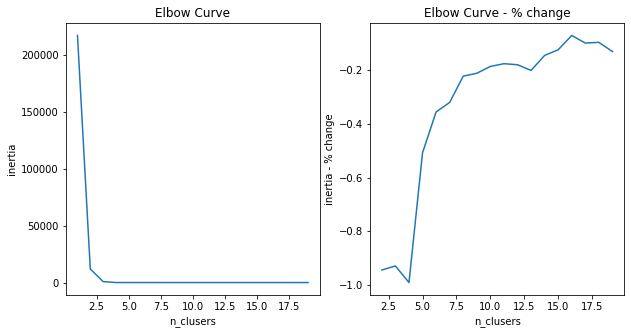

In [6]:
elbow_curve = [ None ] + [ sklearn.cluster.KMeans(n_clusters=n, random_state=0).fit(portfolio_summary).inertia_ for n in range(1,20) ]

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot( elbow_curve )
axes[0].set_title('Elbow Curve')    
axes[0].set_xlabel('n_clusers')
axes[0].set_ylabel('inertia')

axes[1].plot( Series(elbow_curve).pct_change() )
axes[1].set_title('Elbow Curve - % change')    
axes[1].set_xlabel('n_clusers')
axes[1].set_ylabel('inertia - % change')

In [7]:
elbow_curve_select = [5, 9]

In [8]:
cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

In [10]:

for n in elbow_curve_select:
    portfolio_summary['cluster_'+str(n)] = portfolio_kmeans[n].predict( portfolio_summary[['returns', 'volatility']] )
portfolio_summary

,returns,volatility,cluster_5,cluster_9
Stocks\Large_Cap\ADANIPORTS,0.060376,0.309436,0,0
Stocks\Large_Cap\ASIANPAINT,0.097791,0.209249,0,0
Stocks\Large_Cap\AXISBANK,0.232722,0.277636,0,0
Stocks\Large_Cap\BAJFINANCE,0.453413,0.320735,0,7
Stocks\Large_Cap\BPCL,-0.260891,0.435982,4,5
...,...,...,...,...
Stocks\Small_Cap\SONATSOFTW,0.455334,0.401531,0,7
Stocks\Small_Cap\SUZLON,-0.467204,0.592955,4,4
Stocks\Small_Cap\VENKEYS,0.380938,0.626748,0,7
Stocks\Small_Cap\VIPIND,0.478693,0.431633,0,7
